## Mini-Batch 학습법

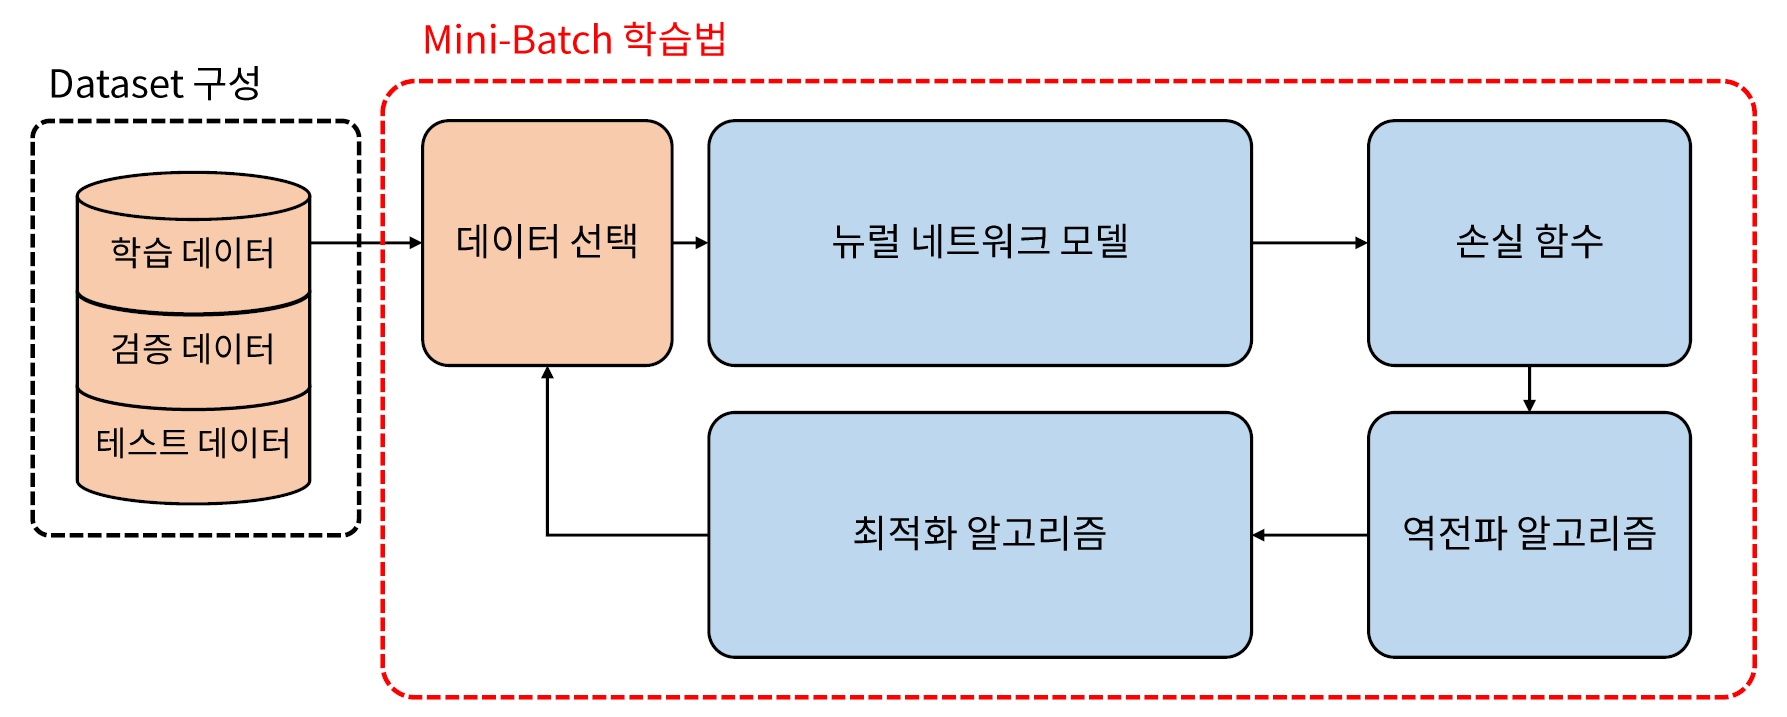
- 뉴럴 네트워크의 학습 과정
  1. 뉴럴 네트워크 모델 선정
  2. 손실 함수 도출
  3. 역전파 알고리즘을 통해 최적의 세타값 도출
  4. 알고리즘의 최적화
  
#### 데이터의 정제에 대해서는 우리가 다루지 못함

## Vanilla Gradient Descent
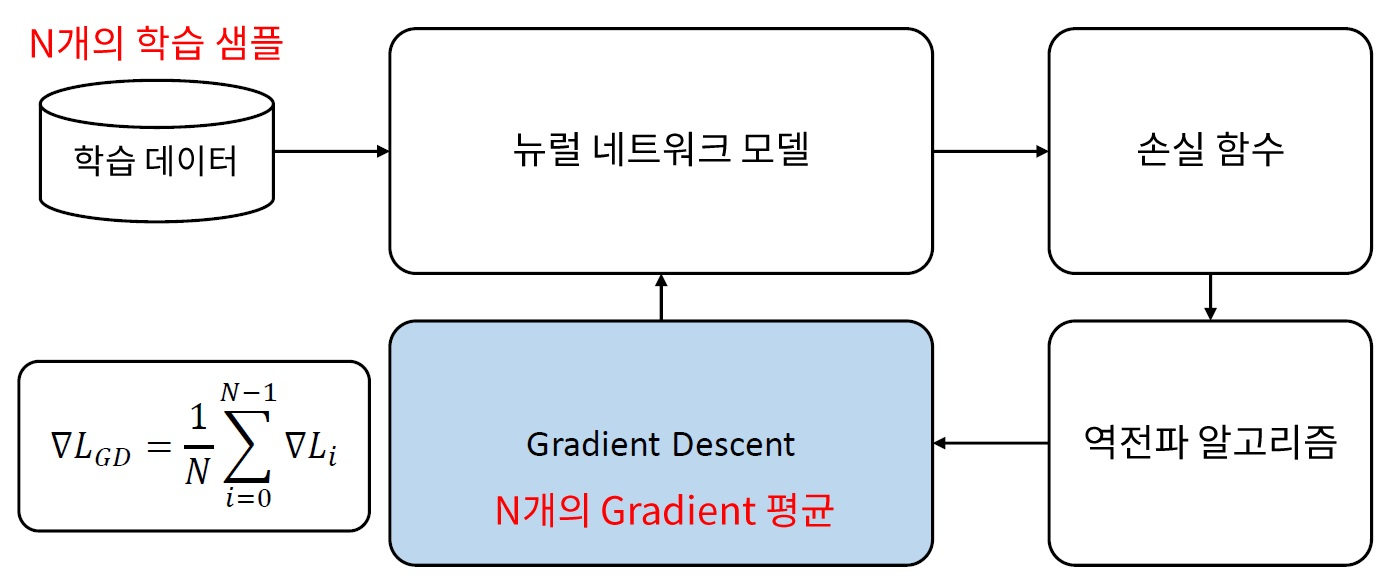
- 우리가 기존에 배워온 Gradient Descent 방법을 Vanilla 방법이라고 함
- N개의 입력에 따른 N개의 정답이 존재하는 형태임
- 이는 Gradient를 **한 번 업데이트하기 위해 모든 학습 데이터를 사용한다.**
  - N개의 Gradient Descent를 하기 위해 N개의 Gradient 평균을 낸다는 소리
  - 이는 생각보다 엄청 비효율적이다!

## Stochastic Gradient Descent(확률적 기울기)
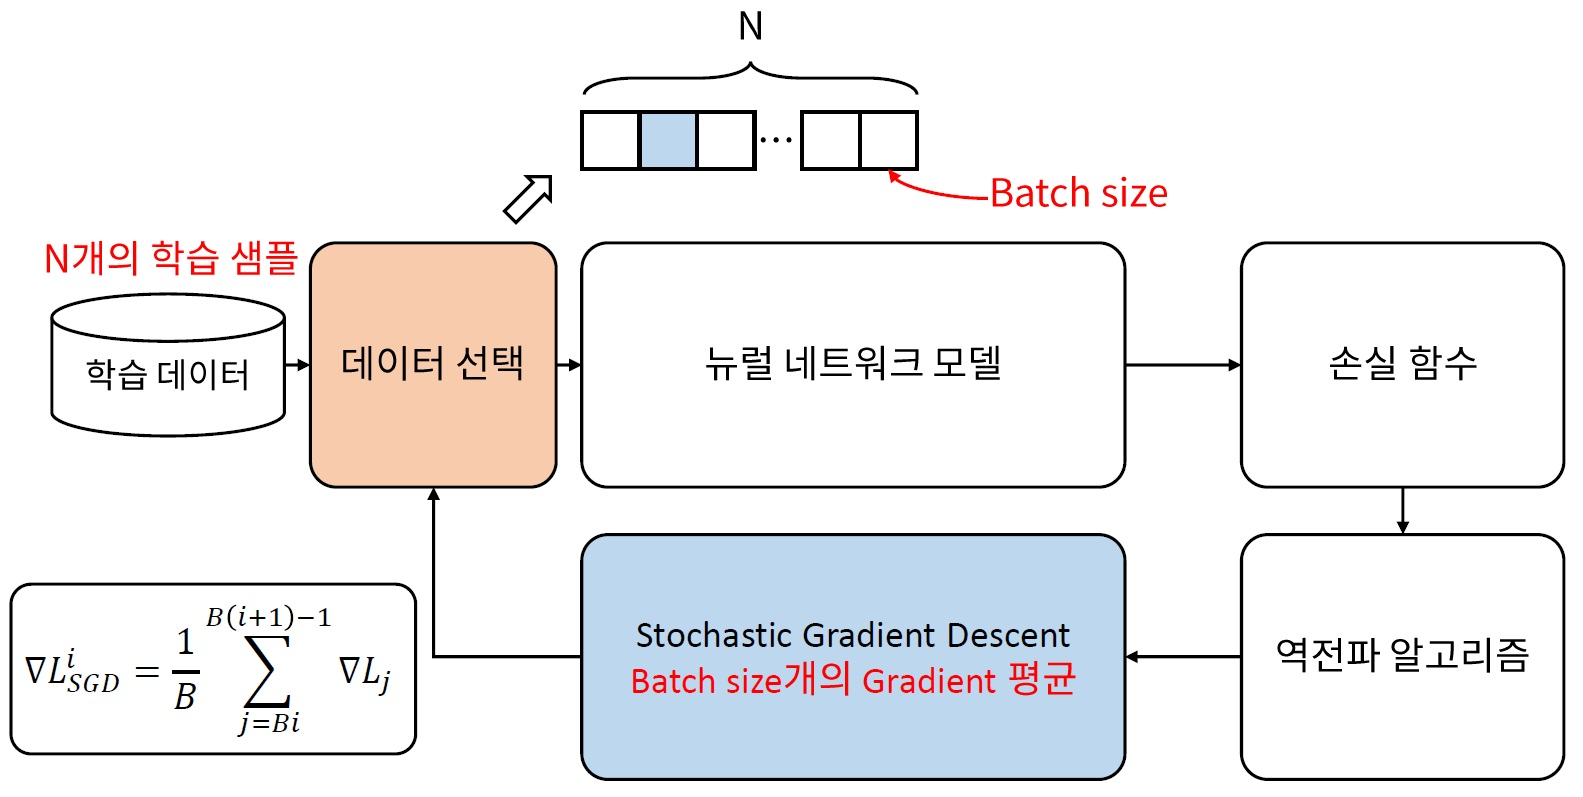
- 학습 데이터를 그대로 사용하는 것이 아니라 **한 번 업데이트하기 위해 일부의 데이터셋을 사용하는 것**
- Batch 사이즈는 기본적으로 8/16/32/64 정도로 만들어 이에 대해서만 손실함수/알고리즘을 만드는 것
  - 모든 학습 데이터가 아니기 때문에 Batch size만큼의 Gradient 평균이 도출된다.

## Mini-Batch 학습법 : 데이터 관점에서 보는
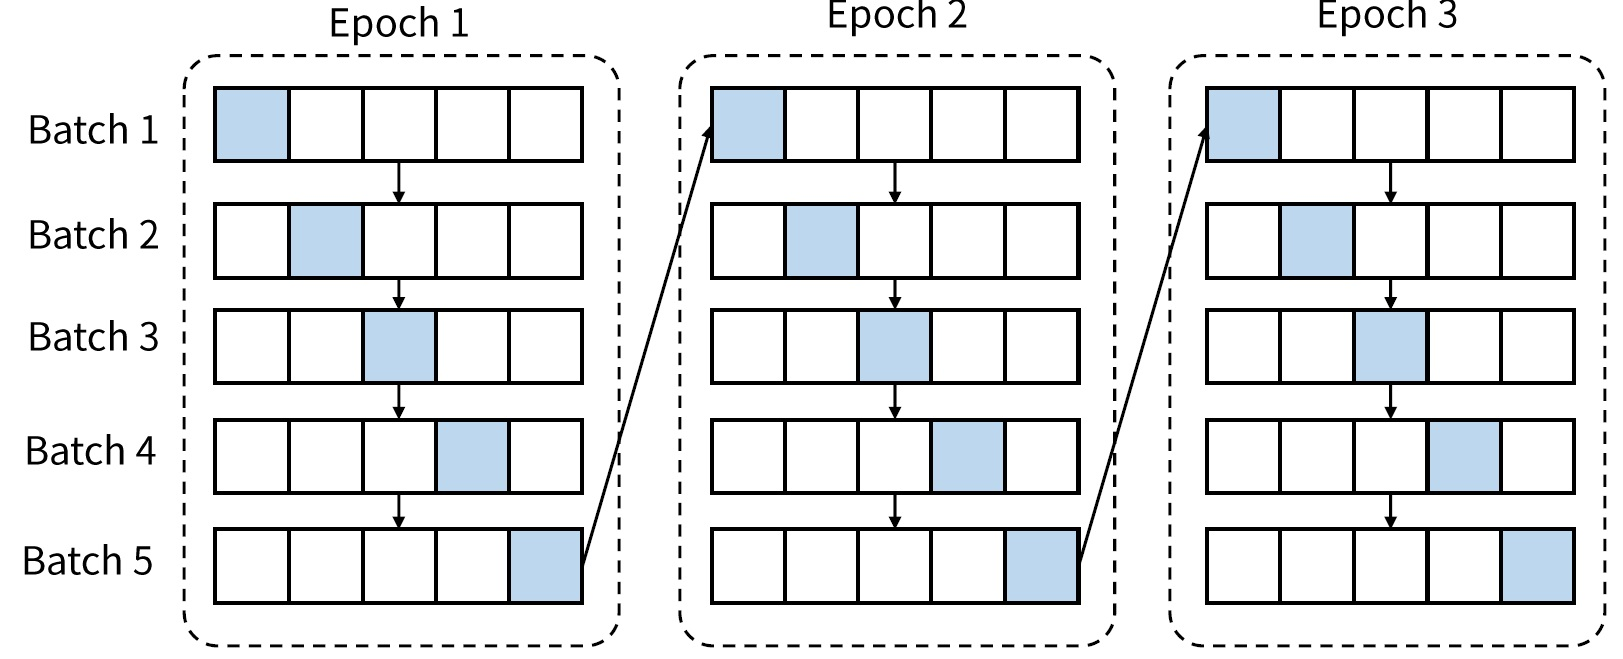
- 학습 데이터 전체를 한 번 학습하는 것을 Epoch
- Gradient를 구하는 단위를 Batch라고 함
- 각 Epoch에 대한 순서를 보장하지 않아도 됨(각 Epoch는 독립적)
  - 오히려 편향 문제에서 어느정도 벗어날 수 있다는 장점이 존재한다.

## 실 상황에서는...
- 확률적 기울기(Stochastic Gradient)보다 실제 기울기(Vanilla Gradient)가 더 좋은 결과를 보여준다.
### 이럼에도 불구하고 SGD를 사용하는 이유는 무엇일까?

## GD vs SGD
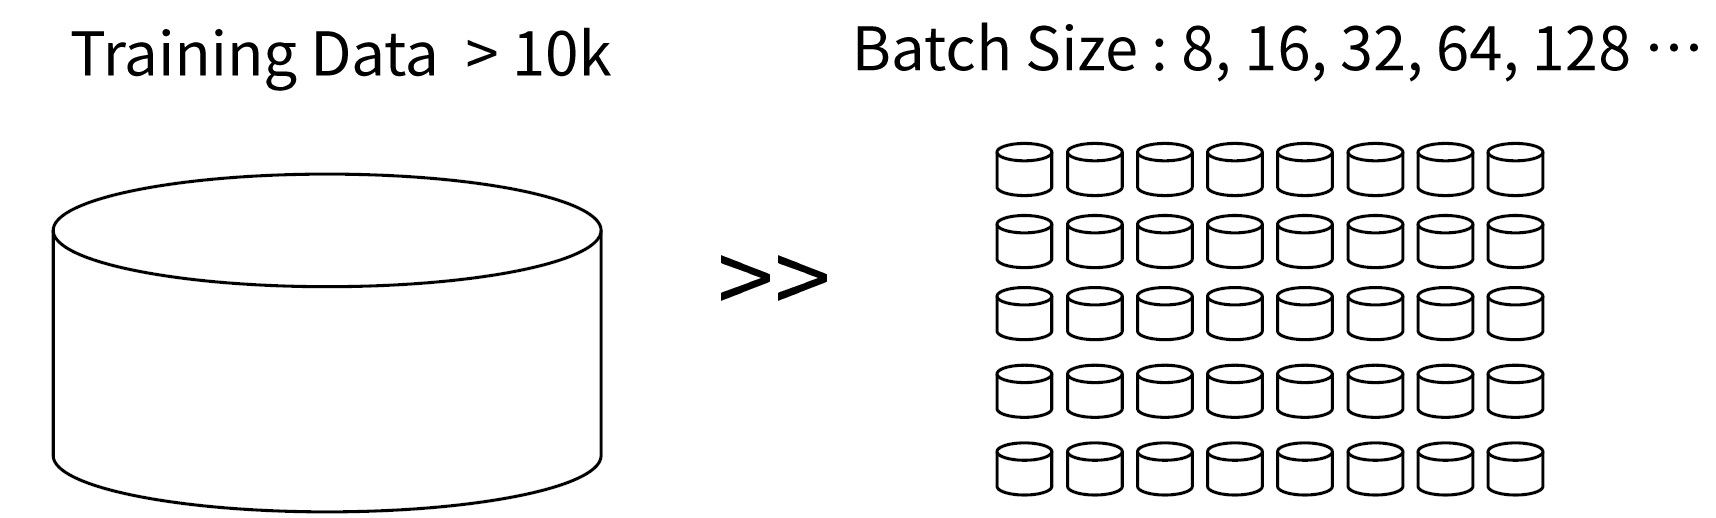
- Gradient를 한 번 업데이트 하는데 걸리는 시간이 수백, 수천 배 이상 차이난다.
- SGD에서 Gradient의 질이 떨어지는 부분은 **심화 최적화 알고리즘**으로 해결이 가능함

## 데이터 셋의 이해
### 공개 데이터셋
- 현상금이 걸린 Challenge에도 참여하여 희열을 느껴볼 수도 있다.

### 산업용 데이터
- 무수히 많은 기호가 발생하는 산업 현장.
- 그 중 극히 일부가 취득되어 데이터가 됨
  - 취득된 데이터 중 딥러닝 학습에 유용한 데이터를 선별하는 일은 절대로 간단하지 않음

### 데이터셋의 구성
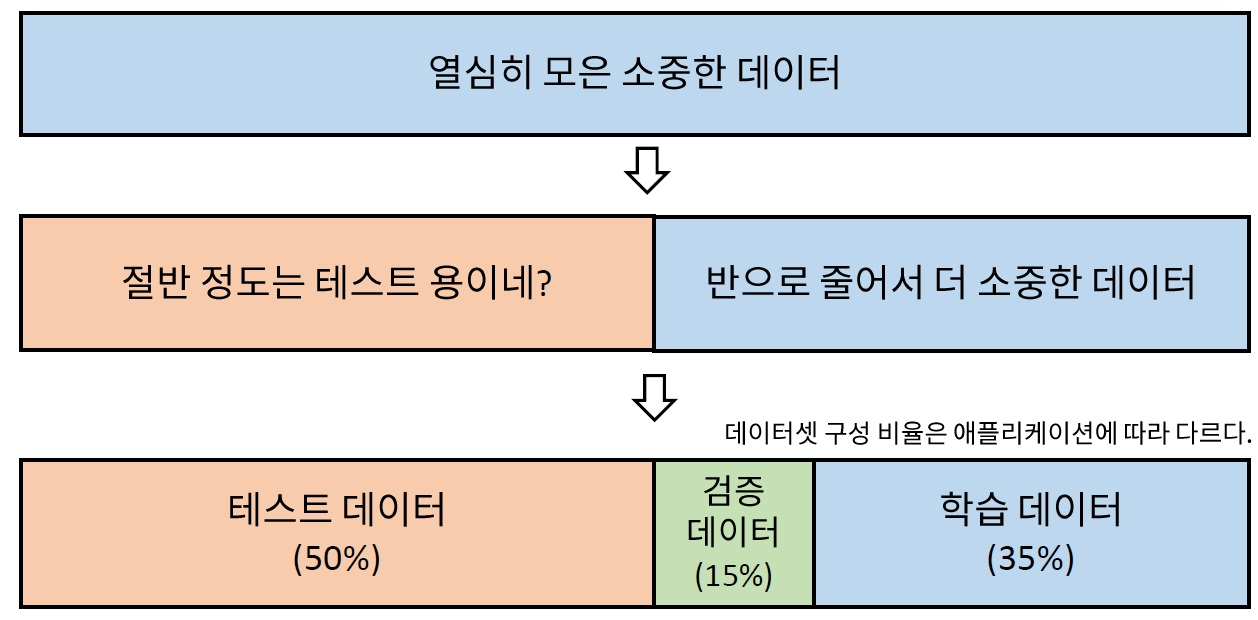
- 사용 가능한 데이터셋은 매우 소중하다. 소중한 데이터를 모두 학습에 쓰지 않고 나누어 사용하는 데에는 이유가 있다.
  - 과적합 방지를 위해서겠지

## 각 데이터셋의 의미
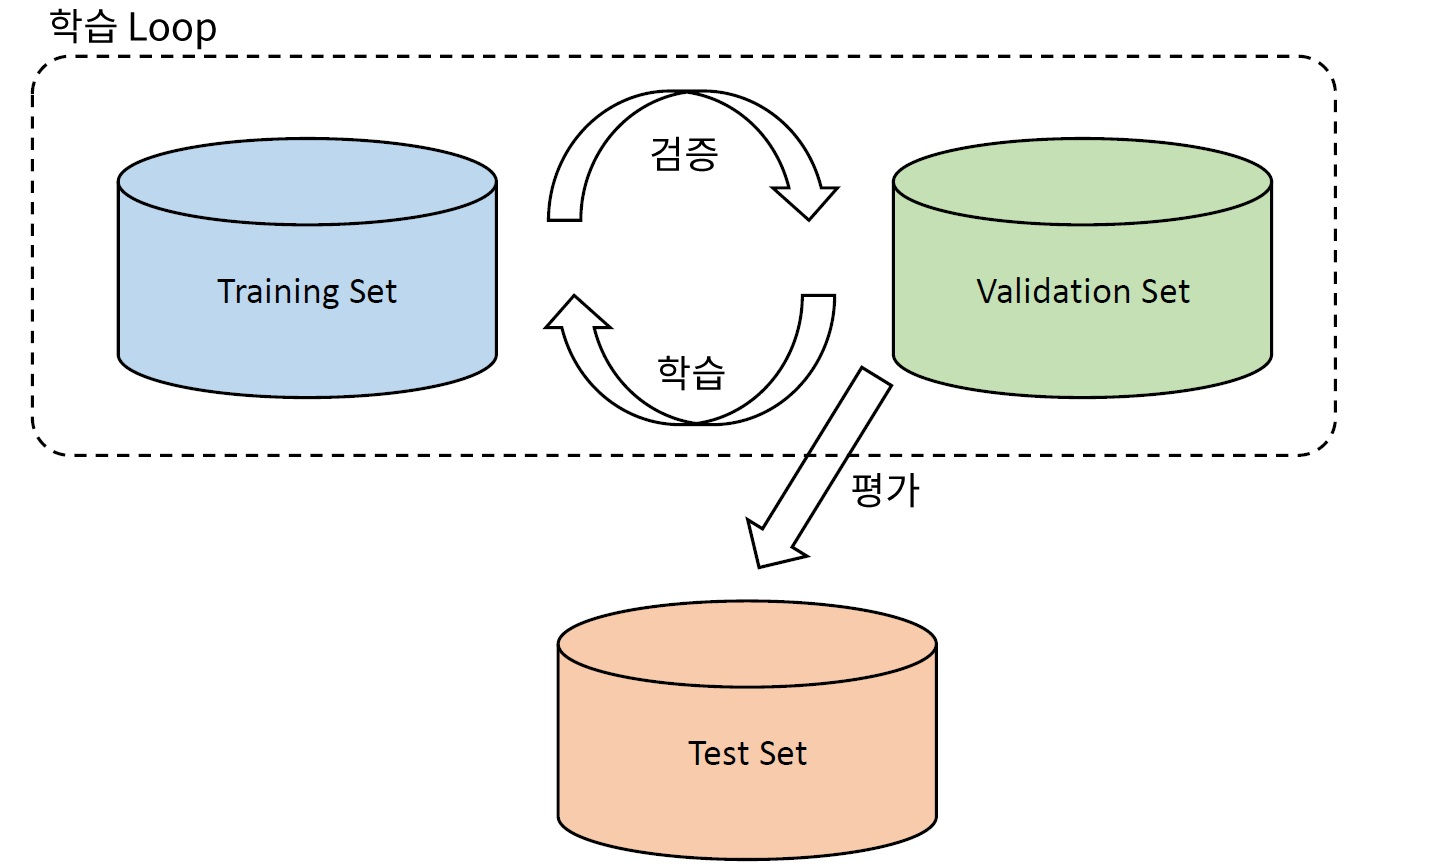
- 학습 데이터(Training Data) : 학습 과정에 보여지고, **실제 모델을 학습하는 데에 사용되는 데이터**
- 검증 데이터(Validation Data) : 학습 과정에 보여지는 데이터지만, 모델 학습에 사용하지 않고 **학습이 잘 되고 있는지 검증**하는 데에만 사용
- 테스트 데이터(Test Data) : 학습 과정에서는 보여지지 않고, **학습을 마친 모델을 평가**하기 위해 단 한 번만 보여지는 데이터

## 해치웠나...? : 매개 변수의 종류
- 매개 변수의 종류(Parameters)
  - 학습 가능한 매개 변수(Trainable Parameters) : 최적화 또는 다른 방법으로 **학습되는 변수**
  - 초매개변수(Hyperparameters) : 알고리즘 결과에 영향을 주지만, **처음 결정한 후 학습되지 않는 변수**
  
#### 선택이 필요한 모든 것이 이쪽 업계에서는 초매개변수라고 부른다.
- Github, Manual Search, 이론적 방법 등을 활용(Reference)하여 개선하는 방법을 끊임없이 찾아내야 함

## 초매개변수 최적화 방법 : 이론적 방법
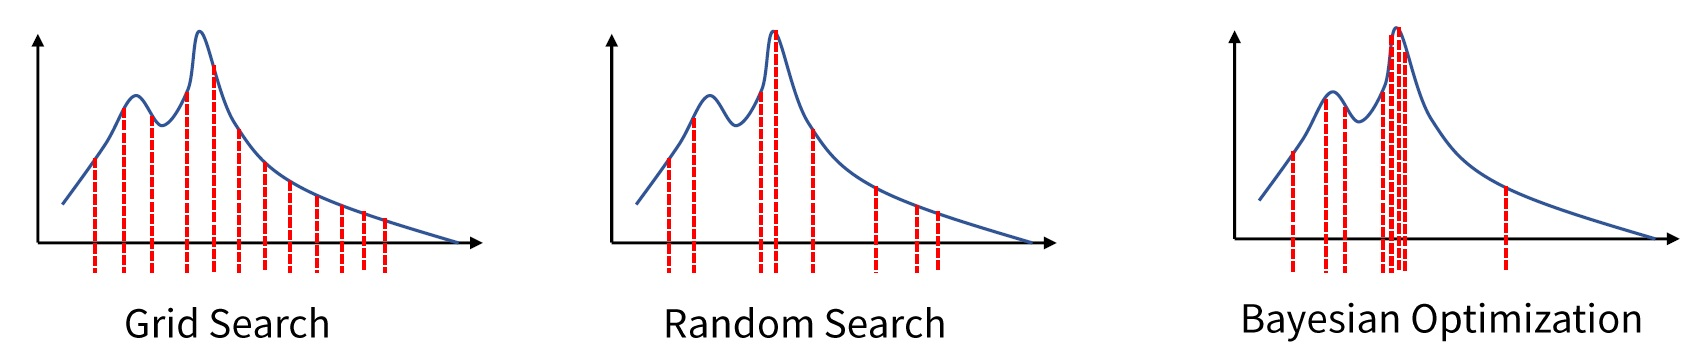
- Manual Search 결과를 신뢰하기 어려울 때, 이론적인 방법을 이용하여 더욱 최적화된 초매개변수 값을 찾을 수 있다.
- **Grid Search** : 초매개변수를 등간격으로 나누어 선정하는 방법
  - 굉장히 비효율적임, 다만 구현이 가장 쉬움
- **Random Search** : Grid Search 대비 확률적으로 더 나은 초매개변수 값을 구해낼 수 있음
  - 하지만 랜덤성에만 의지할수는 없겠지?
- Bayesian Optimization : 하나의 변수를 선택하고 그 주변의 최댓값을 착취(expolit)하여 가장 ㅇ

## 뉴럴 네트워크 학습 알고리즘 구현
- Keras 사용과 Tensorflow 2.0 두 가지의 방법이 존재함
- 강의에서는 Keras 위주로 하도록 함
### 해당 코드는 tensorflow

In [1]:
# import modules
import tensorflow as tf
# 하이퍼파라미터 정의
EPOCH=10

In [2]:
#네트워크 구조 정의
class MyModel(tf.keras.Model):
    def __init__(self):
        super().__init__()#상위 클래스 먼저 호출
        self.flatten=tf.keras.layers.Flatten(input_shape=(28,28))#28 by 28 그림을 flatten
        self.dense1=tf.keras.layers.Dense(32,activation='relu')
        #덴스 모델을 사용할 때 몇 개의 Dense를 사용할지 정의하여야 함
        self.dense2=tf.keras.layers.Dense(64,activation='relu')
        self.dense3=tf.keras.layers.Dense(128,activation='relu')
        self.dense4=tf.keras.layers.Dense(256,activation='relu')
        
        self.dense5=tf.keras.layers.Dense(10,activation='softmax')
        #출력은 정해져있기 때문에 10개의 출력. multiclass 출력을 위해 softmax
    def call(self,x,training=None,mask=None):#call 부분에서는 연결성만 정의를 해주면 됨
        x=self.flatten(x)
        x=self.dense1(x)
        x=self.dense2(x)
        x=self.dense3(x)
        x=self.dense4(x)
        return self.dense5(x)

In [3]:
@tf.function #연산이 모두 tf 함수를 사용하게 되어(파이썬이 아닌) 최적화된 연산이 가능
#학습 함수 구현
def train_step(model, images, labels, loss_object, optimizer, train_loss, train_accuracy):
    with tf.GradientTape() as tape:#내부에서 일어나는 모든 연산에 대해 기울기 계산을 수행함(정방향 연산)
        predictions=model(images) #배치 사이즈 X 10클래스
        loss=loss_object(labels, predictions)
    gradients=tape.gradient(loss,model.trainable_variables)#모든 손실값을 학습 가능한 변수들에 대하여 미분(역방향 연산을 위함)
    optimizer.apply_gradients(zip(gradients,model.trainable_variables))#위에서 도출된 gradient 변수를 바탕으로 각각의 기울기에 대한 업데이트 진행
    
    train_loss(loss)
    train_accuracy(labels, predictions)

In [5]:
@tf.function
def test_step(model, images, labels, loss_object, test_loss, test_accuracy):
    predictions=model(images) #배치 사이즈 X 10클래스
    loss=loss_object(labels, predictions) #배치 사이즈만을 가짐
    
    test_loss(loss)
    test_accuracy(labels, predictions)

In [8]:
#데이터 불러오기
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train,x_test=x_train/255.0, x_test/255.0 #영상 해상도의 값은 255 이하의 값이기에 나누어 저장하여야 함

train_ds=tf.data.Dataset.from_tensor_slices((x_train,y_train)).shuffle(1024).batch(32)#1024개로 나누어 섞고 한 번의 테스트에 32개의 데이터 사용
test_ds=tf.data.Dataset.from_tensor_slices((x_test,y_test)).batch(32)

In [9]:
#모델 생성
model=MyModel()

In [10]:
#손실함수 및 최적화 알고리즘 정의
print(y_train)
print(y_train.shape)
#0부터 9까지의 숫자가 들어가있는 sparse 형태임을 알 수 있다.

[5 0 4 ... 5 6 8]
(60000,)


In [11]:
loss_object=tf.keras.losses.SparseCategoricalCrossentropy()#위의 코드가 sparse 형태이기 때문에 sparseCategorical
optimizer=tf.keras.optimizers.Adam()

In [13]:
#성능 지표 정의
train_loss=tf.keras.metrics.Mean(name='train_loss')
train_accuracy=tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

test_loss=tf.keras.metrics.Mean(name='test_loss')
test_accuracy=tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

In [16]:
#학습 루프 구현
for epoch in range(EPOCH):
    for images, labels in train_ds:#배치 크기만큼 수행됨
        train_step(model, images, labels, loss_object, optimizer, train_loss, train_accuracy)
    for images, labels in test_ds:
        test_step(model, images, labels, loss_object, test_loss, test_accuracy)
    template='Epoch {}, Loss: {}, Accuracy: {}, Test Loss:{}, Test Accuracy: {}'
    print(template.format(epoch+1,
                          train_loss.result(),
                          train_accuracy.result()*100,
                          test_loss.result(),
                          test_accuracy.result()*100))
    #아래는 누적된 상태를 없애기 위해 작성된 리셋 코드
    train_loss.reset_state()
    train_accuracy.reset_state()
    test_loss.reset_state()
    test_accuracy.reset_state()

Epoch 1, Loss: 0.2902187705039978, Accuracy: 91.22999572753906, Test Loss:0.1854017972946167, Test Accuracy: 94.27999877929688
Epoch 2, Loss: 0.14122754335403442, Accuracy: 95.75499725341797, Test Loss:0.15624792873859406, Test Accuracy: 95.5999984741211
Epoch 3, Loss: 0.11255402863025665, Accuracy: 96.55500030517578, Test Loss:0.14545322954654694, Test Accuracy: 95.81999969482422
Epoch 4, Loss: 0.09380815178155899, Accuracy: 97.07333374023438, Test Loss:0.13120581209659576, Test Accuracy: 96.27000427246094
Epoch 5, Loss: 0.08155658841133118, Accuracy: 97.42500305175781, Test Loss:0.11509539932012558, Test Accuracy: 96.69000244140625
Epoch 6, Loss: 0.07215061038732529, Accuracy: 97.63833618164062, Test Loss:0.13492225110530853, Test Accuracy: 96.38999938964844
Epoch 7, Loss: 0.06327679753303528, Accuracy: 97.92666625976562, Test Loss:0.13322442770004272, Test Accuracy: 96.45999908447266
Epoch 8, Loss: 0.05618646368384361, Accuracy: 98.19999694824219, Test Loss:0.10953471809625626, Test

### Accuracy는 약간 흔들릴 수 있다. 기본적인 구현을 하였기에 정확도/손실이 흔들리는 것은 감안해야 함